## Proyecto Final Introdución a Python para Ciencia Datos

### Etapa 1

descarga dataset de : 
https://www.kaggle.com/code/mpwolke/world-cup-date-preparation/data
https://www.kaggle.com/datasets/cashncarry/fifaworldranking/metadata

### Etapa 2
#### a) Importacion de Paquetes

In [1]:
import pandas as pd  #Pandas nos permite trabajar con DataFrames
import numpy as np   #Numpy nos sirve para trabajar con los datos en forma de matrices
import matplotlib.pyplot as plt   #Nos permite realizar los graficos
import seaborn as sns  #Nos permite trabajar con graficos
import datetime as dt #Sirve para manipular los datos de tipo fecha

#### b) Carga de dataset

In [2]:
path = r'/home/diego/Win/Visualización Python/Proyecto Final'

#Extrae los datos del ranking fifa de seleciones de mundo masculino
df_rank = pd.read_csv(path+'/fifa_ranking-2022-08-25.csv',sep=',', header=0, index_col=False
                          , encoding='latin-1', engine='python' )

#Extrae los datos de las copas mundiales de futbol de la fifa
df_wc = pd.read_csv(path+'/matches.csv',sep=',', header=0, index_col=False
                          , encoding='latin-1', engine='python' )


#### c) 5 Tecnicas de Exploracion

In [3]:
#Muestra los Primeros 5 registros
df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,211,San Marino,SMR,763.82,763.82,0,UEFA,1992-12-31
1,75,Oman,OMA,1323.03,1323.03,0,AFC,1992-12-31
2,74,Bulgaria,BUL,1325.16,1325.16,0,UEFA,1992-12-31
3,73,Cabo Verde,CPV,1331.46,1332.96,1,CAF,1992-12-31
4,72,Congo DR,COD,1332.84,1332.84,-1,CAF,1992-12-31


In [4]:
#Muestra los Ultimos 5 registros
df_rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
67726,76,Israel,ISR,1316.35,1316.35,0,UEFA,2022-08-25
67727,77,Uzbekistan,UZB,1306.63,1306.63,0,AFC,2022-08-25
67728,78,China PR,CHN,1305.06,1304.02,0,AFC,2022-08-25
67729,80,Honduras,HON,1299.69,1299.69,0,CONCACAF,2022-08-25
67730,211,San Marino,SMR,763.82,763.82,0,UEFA,2022-08-25


In [5]:
#Muestra la cantidad de Filas y columnas
df_rank.shape

(67731, 8)

In [6]:
#Muestra metadata de DataFrame
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67731 entries, 0 to 67730
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             67731 non-null  int64  
 1   country_full     67731 non-null  object 
 2   country_abrv     67731 non-null  object 
 3   total_points     67731 non-null  float64
 4   previous_points  67731 non-null  float64
 5   rank_change      67731 non-null  int64  
 6   confederation    67731 non-null  object 
 7   rank_date        67731 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.1+ MB


In [7]:
#Muestra estadistica basica de las columna numericas
df_rank.describe()

,rank,total_points,previous_points,rank_change
count,67731.000000,67731.000000,67731.000000,67731.000000
mean,106.000000,1220.645592,1220.621848,0.000000
std,60.910219,252.732553,252.754256,0.674524
min,1.000000,763.820000,763.820000,-3.000000
25%,53.000000,1004.750000,1004.750000,0.000000
50%,106.000000,1183.900000,1183.900000,0.000000
75%,159.000000,1435.740000,1435.740000,0.000000
max,211.000000,1837.560000,1837.560000,4.000000


In [8]:
#Muestra las caracteristicas del Indice
df_rank.index

RangeIndex(start=0, stop=67731, step=1)

In [9]:
#Muestra un lista de con los nombre de las columnas
df_rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')

In [10]:
df_wc.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [11]:
df_wc.tail()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
895,2018,Russia,Sochi,Quarterfinals,Russia,Croatia,2,2,A,Croatia won in penalties (4 - 3),Croatia,Russia,2018-07-07,Jul,Saturday
896,2018,Russia,Saint Petersburg,Semifinals,France,Belgium,1,0,H,NaN,France,Belgium,2018-07-10,Jul,Tuesday
897,2018,Russia,Moscow,Semifinals,Croatia,England,2,1,H,Croatia won in AET,Croatia,England,2018-07-11,Jul,Wednesday
898,2018,Russia,Saint Petersburg,Third place,Belgium,England,2,0,H,NaN,Belgium,England,2018-07-14,Jul,Saturday
899,2018,Russia,Moscow,Final,France,Croatia,4,2,H,NaN,France,Croatia,2018-07-15,Jul,Sunday


In [12]:
df_wc.shape

(900, 15)

In [13]:
df_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            900 non-null    int64 
 1   country         900 non-null    object
 2   city            900 non-null    object
 3   stage           900 non-null    object
 4   home_team       900 non-null    object
 5   away_team       900 non-null    object
 6   home_score      900 non-null    int64 
 7   away_score      900 non-null    int64 
 8   outcome         900 non-null    object
 9   win_conditions  62 non-null     object
 10  winning_team    731 non-null    object
 11  losing_team     731 non-null    object
 12  date            900 non-null    object
 13  month           900 non-null    object
 14  dayofweek       900 non-null    object
dtypes: int64(3), object(12)
memory usage: 105.6+ KB


In [14]:
df_wc.describe()

,year,home_score,away_score
count,900.000000,900.000000,900.000000
mean,1986.915556,1.568889,1.262222
std,23.150270,1.489574,1.313960
min,1930.000000,0.000000,0.000000
25%,1970.000000,0.000000,0.000000
50%,1990.000000,1.000000,1.000000
75%,2006.000000,2.000000,2.000000
max,2018.000000,10.000000,8.000000


In [15]:
df_wc.index

RangeIndex(start=0, stop=900, step=1)

In [16]:
df_wc.columns

Index(['year', 'country', 'city', 'stage', 'home_team', 'away_team',
       'home_score', 'away_score', 'outcome', 'win_conditions', 'winning_team',
       'losing_team', 'date', 'month', 'dayofweek'],
      dtype='object')

### Etapa 3
#### a) Seleccion de columnas

In [17]:
mundiales = df_wc[['date','country', 'city', 'stage', 'home_team', 'away_team',
       'home_score', 'away_score', 'win_conditions', 'winning_team',
       'losing_team' ]]

#### b) Validacion de tipos

In [18]:
mundiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            900 non-null    object
 1   country         900 non-null    object
 2   city            900 non-null    object
 3   stage           900 non-null    object
 4   home_team       900 non-null    object
 5   away_team       900 non-null    object
 6   home_score      900 non-null    int64 
 7   away_score      900 non-null    int64 
 8   win_conditions  62 non-null     object
 9   winning_team    731 non-null    object
 10  losing_team     731 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.5+ KB


#### c)  Revision formatos de fecha

In [19]:
#Cambiando el formato de fecha
mundiales['date']=pd.to_datetime(mundiales['date'], format='%Y-%m-%d %H:%M:%S')

mundiales['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 900 entries, 0 to 899
Series name: date
Non-Null Count  Dtype         
--------------  -----         
900 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.2 KB


/tmp/ipykernel_4824/2412613871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mundiales['date']=pd.to_datetime(mundiales['date'], format='%Y-%m-%d %H:%M:%S')


#### d) Extracion de fecha año, mes y nombre mes

In [20]:
mundiales['Anio'] = pd.to_datetime(mundiales['date']).dt.year
mundiales['Mes_Name'] = pd.to_datetime(mundiales['date']).dt.month_name()
mundiales['Mes'] = pd.to_datetime(mundiales['date']).dt.month
mundiales['Dia']= pd.to_datetime(mundiales['date']).dt.day_name()

/tmp/ipykernel_4824/4288233541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mundiales['Anio'] = pd.to_datetime(mundiales['date']).dt.year
/tmp/ipykernel_4824/4288233541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mundiales['Mes_Name'] = pd.to_datetime(mundiales['date']).dt.month_name()
/tmp/ipykernel_4824/4288233541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

#### e) Union de bases de datos

In [21]:
#Resumen tabla rancking fifa para hacer la union
df_rank2 = df_rank.groupby(['country_full','country_abrv','confederation'])['rank'].mean()
df_rank2= pd.DataFrame(df_rank2).reset_index()

df_rank2 = df_rank2.set_index('rank').sort_index()

print(df_rank2.loc[1:20])


     country_full country_abrv confederation
rank                                        
1.0        Brazil          BRA      CONMEBOL
2.0       Belgium          BEL          UEFA
3.0     Argentina          ARG      CONMEBOL
4.0        France          FRA          UEFA
5.0       England          ENG          UEFA
6.0         Spain          ESP          UEFA
7.0         Italy          ITA          UEFA
8.0   Netherlands          NED          UEFA
9.0      Portugal          POR          UEFA
10.0      Denmark          DEN          UEFA
11.0      Germany          GER          UEFA
12.0       Mexico          MEX      CONCACAF
13.0      Uruguay          URU      CONMEBOL
14.0          USA          USA      CONCACAF
15.0      Croatia          CRO          UEFA
16.0  Switzerland          SUI          UEFA
17.0     Colombia          COL      CONMEBOL
18.0      Senegal          SEN           CAF
19.0        Wales          WAL          UEFA
20.0       Sweden          SWE          UEFA


### Etapa 4  (Limpieza)
#### a) Valores Vacios

In [22]:
mundiales.isna().sum()

date                0
country             0
city                0
stage               0
home_team           0
away_team           0
home_score          0
away_score          0
win_conditions    838
winning_team      169
losing_team       169
Anio                0
Mes_Name            0
Mes                 0
Dia                 0
dtype: int64

In [23]:
#Los valores vacios son valores texto, para este analisis no es necesario eliminarlos
#se va reemplazaran por 0

mundiales = mundiales.fillna(0)

fil=mundiales['win_conditions']!= 0

mundiales[fil]


,date,country,city,stage,home_team,away_team,home_score,away_score,win_conditions,winning_team,losing_team,Anio,Mes_Name,Mes,Dia
19,1934-05-27,Italy,Turin,Round of 16,Austria,France,3,2,Austria won in AET,Austria,France,1934,May,5,Sunday
34,1934-06-10,Italy,Rome,Final,Italy,Czechoslovakia,2,1,Italy won in AET,Italy,Czechoslovakia,1934,June,6,Sunday
36,1938-06-05,France,Strasbourg,Round of 16,Brazil,Poland,6,5,Brazil won in AET,Brazil,Poland,1938,June,6,Sunday
38,1938-06-05,France,Le Havre,Round of 16,Czechoslovakia,Netherlands,3,0,Czechoslovakia won in AET,Czechoslovakia,Netherlands,1938,June,6,Sunday
41,1938-06-05,France,Marseille,Round of 16,Italy,Norway,2,1,Italy won in AET,Italy,Norway,1938,June,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2018-07-01,Russia,Moscow,Round of 16,Russia,Spain,1,1,Russia won in penalties (4 - 3),Russia,Spain,2018,July,7,Sunday
887,2018-07-01,Russia,Nizhny Novgorod,Round of 16,Croatia,Denmark,1,1,Croatia won in penalties (3- 2),Croatia,Denmark,2018,July,7,Sunday
891,2018-07-03,Russia,Moscow,Round of 16,Colombia,England,1,1,England won in penalties (4 -3),England,Columbia,2018,July,7,Tuesday
895,2018-07-07,Russia,Sochi,Quarterfinals,Russia,Croatia,2,2,Croatia won in penalties (4 - 3),Croatia,Russia,2018,July,7,Saturday


#### c) Validacion valores duplicados

Los valores duplicado que tenia eran en el data set de rack los elimine en la etapa #3  en el punto
e) Union de bases de datos

#### d) Metodo validacion resultados de filas

Dataset no cuenta con operaciones arimeticas

### Etapa 4 (Simplyficar)
#### a) Agrupaciones

In [24]:
#Crea un dataset de solo finales
finales = mundiales[mundiales['stage'] == 'Final']

#Se hace una agrupacion de los equipo ganadores, para saber cuantas copas a ganado en la historia
df_grp_1= pd.DataFrame(finales.groupby(['winning_team'])['stage'].count()).reset_index()

#Cambia el nombre a la columnas
df_grp_1.rename({'stage':'cups_won'}, axis=1, inplace=True)

#Ordena pais con mas cups won.
df_grp_1.sort_values('cups_won',ascending=False, inplace=True)

In [25]:
winning_team = df_grp_1.set_index('winning_team')

losing_team = pd.DataFrame(finales.groupby(['losing_team'])['stage'].count())

losing_team.rename({'stage':'cups_lost'}, axis=1, inplace=True)

#agregando los datos
df_grp_2 = pd.merge(df_grp_1,losing_team,
                left_on='winning_team',
                right_on='losing_team',
                how='left')

#llenar los valores vacios con 0
df_grp_2 = df_grp_2.fillna(0)


In [26]:
#Cambiar a tipo entero 
df_grp_2['cups_lost'] = df_grp_2['cups_lost'].astype('int')

In [27]:
finales2 = pd.DataFrame(finales.groupby(['Anio','winning_team'])['stage'].count()).reset_index()


df_grp_3 = finales2.pivot_table(
    'stage', index='winning_team', columns='Anio',
    aggfunc=[np.sum], fill_value='', margins=True
    )

df_grp_3

sum                                               ...            \
Anio         1930 1934 1938 1954 1958 1962 1966 1970 1974 1978  ... 1986 1990   
winning_team                                                    ...             
Argentina                                                  1.0  ...  1.0        
Brazil                            1.0  1.0       1.0            ...             
England                                     1.0                 ...             
France                                                          ...             
Germany                                                         ...             
Italy              1.0  1.0                                     ...             
Spain                                                           ...             
Uruguay       1.0                                               ...             
West Germany                 1.0                      1.0       ...       1.0   
All             1    1    1    1    1    1    1    1    1    1  ...    1    1   

                                                     
Anio         1994 1998 2002 2006 2010 2014 2018 All  
winning_team                                         
Argentina                                         2  
Brazil        1.0       1.0                       5  
England                                           1  
France             1.0                      1.0   2  
Germany                                1.0        1  
Italy                        1.0                  4  
Spain                             1.0             1  
Uruguay                                           1  
West Germany                                      3  
All             1    1    1    1    1    1    1  20  

[10 rows x 21 columns]

In [28]:
df_rank2= df_rank2.reset_index()

In [29]:
rank_fifa = pd.DataFrame(df_rank2.groupby(['country_full'])['rank'].agg(np.mean)).reset_index()

rank_fifa.sort_values('rank', inplace=True)

rank_fifa = rank_fifa.iloc[0:20].set_index('country_full')

### Etapa 5 (Visualizacion)

/tmp/ipykernel_4824/4011995157.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_grp_1['winning_team'], rotation=90)


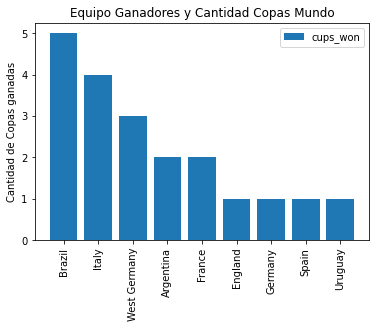

In [30]:
# Grafica barras con las copas ganadas por Pais

fig, ax = plt.subplots()

ax.bar(df_grp_1['winning_team'],df_grp_1['cups_won'], label= 'cups_won')
ax.legend()
ax.set_ylabel('Cantidad de Copas ganadas')
ax.set_title('Equipo Ganadores y Cantidad Copas Mundo')
ax.set_xticklabels(df_grp_1['winning_team'], rotation=90)
plt.show()

Esta grafica podemos ver cuales son 9 equipos que han ganado una copa copas, me ve que Brazil e Italia son las seleciones mas ganadoras. Vemos una particularidad que Alemania del Este a ganado 3 copas antes de la caida del muro de Berlyn, luego la fifa los llama Alemania y contabiliza una copa en 2014

/tmp/ipykernel_4824/3198359664.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(df_grp_1['winning_team'], rotation=90)


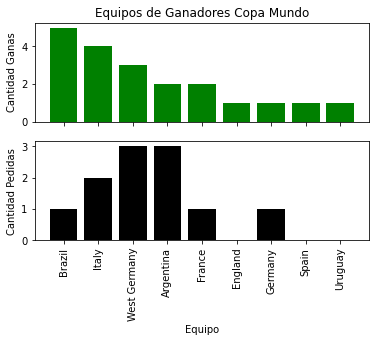

In [31]:
# Grafica barras con las Copas Ganadas vs Copas pedidas por Pais

fig, ax = plt.subplots(2,1, sharex= True)

ax[0].bar(df_grp_2['winning_team'],df_grp_2['cups_won'], label= 'cups_won',color='g')
ax[1].bar(df_grp_2['winning_team'],df_grp_2['cups_lost'], label= 'cups_lost', color='black')


ax[0].set_ylabel('Cantidad Ganas')
ax[1].set_ylabel('Cantidad Pedidas')

ax[0].set_title('Equipos de Ganadores Copa Mundo')

ax[1].set_xlabel('Equipo')

ax[1].set_xticklabels(df_grp_1['winning_team'], rotation=90)
plt.show()

En esta grafica podemos ver que Brazil es el equipo que mas finales a disputado y mas ganador, vemos tambien que England ha disputado una final y la gano.  

In [32]:
rank_fifa=rank_fifa.reset_index()

<AxesSubplot:title={'center':'Ranking de la Seleciones de la Fifa'}, xlabel='rank', ylabel='country_full'>

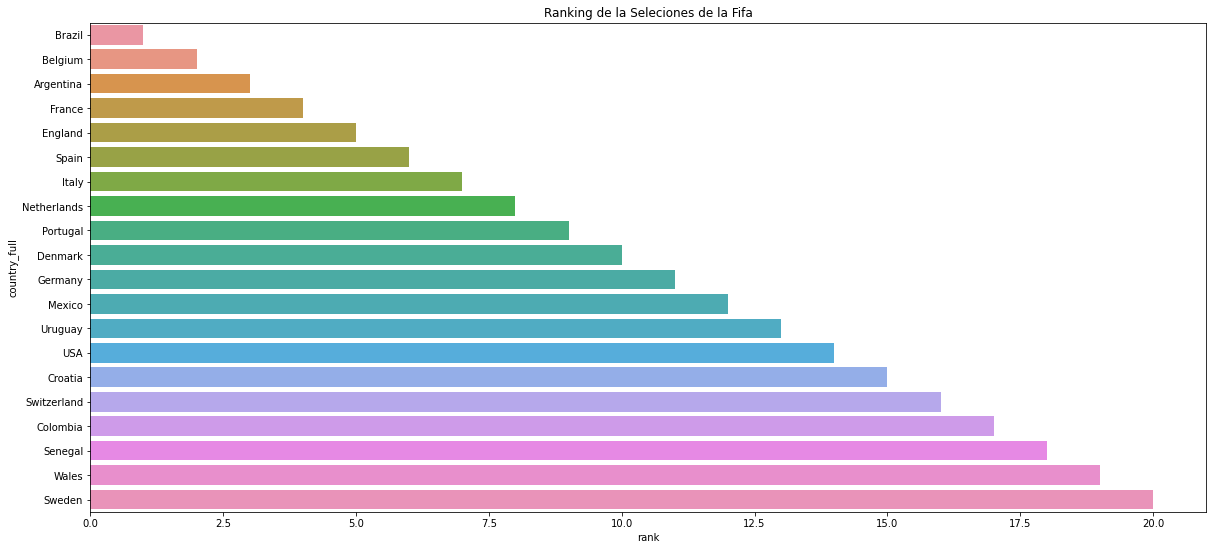

In [33]:
plt.figure(figsize=(20,9))
plt.title("Ranking de la Seleciones de la Fifa")
sns.barplot(data=rank_fifa, x='rank',y='country_full')

Esta Grafica nos muestra el ranking de la fifa a agosto 22, donde vemos que Brazil es la mejor seleccion del mundo, e Italia es la seleccion en 7 lugar apezar de ser la seleccion con 4 copas del mundo.